# **Project Intro**

This notebook introduces the project, which focuses on emotion classification from facial images using deep learning. The dataset is organized into 7 labeled classes: angry, disgust, fear, happy, neutral, sad, and surprise.

Steps:

- 224 images per class were randomly selected from the original dataset, totaling 1,568 images.

- All images were resized to 224×224 pixels and converted to RGB to ensure compatibility with pretrained CNN models.

- The processed images were saved in a new directory and loaded using image_dataset_from_directory.

- A training/validation split was performed (80% training, 60% validation).

- A sample of the dataset was visualized to verify image quality and class labels.


Link to dataset: https://www.kaggle.com/datasets/msambare/fer2013 

# **Load Data**

In [28]:
import os
import random
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory


In [30]:
# Paths
raw_data_dir = "/Users/lauratm/Downloads/archive/train"
subset_dir = "/Users/lauratm/Downloads/archive/subset_224x224"

# Settings
image_size = (224, 224)
max_images_per_class = 224

# Get class names from folders
emotion_classes = [d for d in os.listdir(raw_data_dir) if os.path.isdir(os.path.join(raw_data_dir, d))]

# Make sure subset directory exists
os.makedirs(subset_dir, exist_ok=True)

# Loop through each class
for emotion in emotion_classes:
    source_folder = os.path.join(raw_data_dir, emotion)
    target_folder = os.path.join(subset_dir, emotion)
    os.makedirs(target_folder, exist_ok=True)

    # List images and shuffle
    images = os.listdir(source_folder)
    random.shuffle(images)
    selected_images = images[:max_images_per_class]

    count = 0
    for img_file in selected_images:
        try:
            img_path = os.path.join(source_folder, img_file)
            with Image.open(img_path) as img:
                img = img.convert("RGB") 
                img = img.resize(image_size)
                img.save(os.path.join(target_folder, img_file))
                count += 1
        except Exception as e:
            print(f"Error processing {img_file} in {emotion}: {e}")

    print(f"{emotion}: {count} images resized and saved to {target_folder}")


happy: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/happy
sad: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/sad
fear: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/fear
surprise: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/surprise
neutral: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/neutral
angry: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/angry
disgust: 224 images resized and saved to /Users/lauratm/Downloads/archive/subset_224x224/disgust


In [32]:
batch_size = 10

train_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    subset_dir,
    validation_split=0.6,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

print("Classes:", train_ds.class_names)


Found 1568 files belonging to 7 classes.
Using 1255 files for training.
Found 1568 files belonging to 7 classes.
Using 627 files for validation.
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


# **Visualization** 

2025-07-11 14:41:15.021157: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


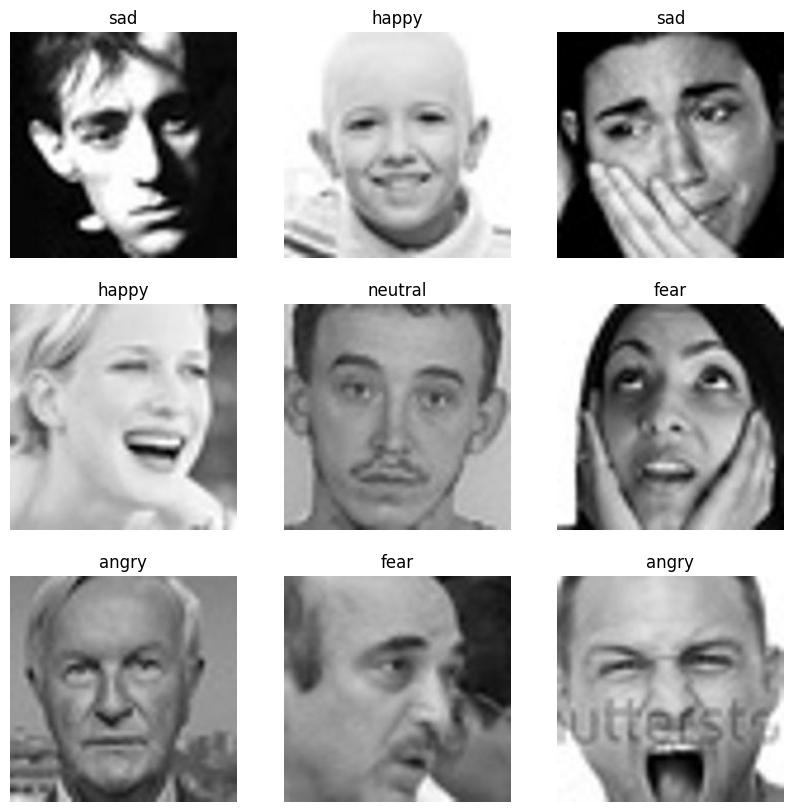

In [34]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
